# CODE 03: Listing 5.1 Fourier Derivative - Pag 107

<IPython.core.display.Javascript object>


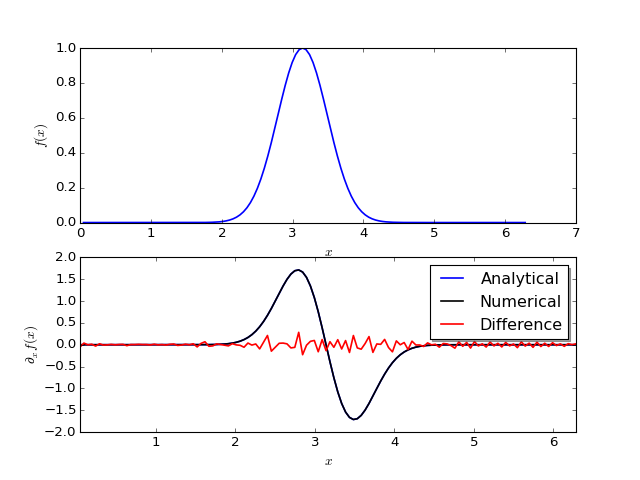

In [1]:
"""
Created on Sat Jan 30 19:50:14 2016
"""
#------------------------------------------------------------------------------
#CHAPTER 5:  The Pseudospectral Method  
#------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Show the plots in the Notebook.
plt.switch_backend("nbagg")

# Basic parameters
nx = 128

#%% CODE 03: Listing 5.1 Fourier Derivative - Pag 107
# Fourier derivative method   
def fourier_derivative(f, dx):
    # Length of vector f
    nx = np.size(f)
    # Initialize k vector up to Nyquist wavenumber      
    kmax = np.pi/dx
    dk = kmax/(nx/2)
    k = np.arange(float(nx))
    k[: nx/2] = k[: nx/2] * dk 
    k[nx/2 :] = k[: nx/2] - kmax
    # Fourier derivative
    ff = np.fft.fft(f); ff = 1j*k*ff
    df_num = np.real(np.fft.ifft(ff))
    return df_num

x, dx = np.linspace(2*np.pi/nx, 2*np.pi, nx, retstep=True) 
sigma = 0.5
xo = np.pi
# Initialize Gauss function 
f = np.exp(-1/sigma**2 * (x - xo)**2)
# Numerical derivative  
df_num = fourier_derivative(f, dx)

# Analytical derivative
df_ana = -2*(x-xo)/sigma**2 * np.exp(-1/sigma**2 * (x-xo)**2)

# Plot Fuctions
plt.subplot(2,1,1)
plt.plot(x,f,color="blue", lw = 1.5)
plt.xlabel('$x$')        
plt.ylabel('$f(x)$')

plt.subplot(2,1,2)
plt.plot(x,df_ana,color="blue", lw = 1.5, label='Analytical')
plt.plot(x,df_num,color="black", lw = 1.5, label='Numerical')
plt.plot(x,1e13*(df_ana-df_num),color="red", lw = 1.5, label='Difference')
plt.legend(loc='upper right', shadow=True)
plt.xlabel('$x$')        
plt.ylabel('$\partial_x f(x)$')
plt.axis([2*np.pi/nx,2*np.pi,-2,2])

plt.savefig('Fig_5.9.png')
plt.show()